In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h1>Loading Dataset</h1>

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


In [3]:
print(f"{train_data.shape}\n{test_data.shape}")


(891, 12)
(418, 11)


In [4]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<h1>Data Preprocessing</h1>

In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h1>Data Visualiztion</h1>

percentage of women survived:  74.20382165605095
percentage of men survived:  18.890814558058924


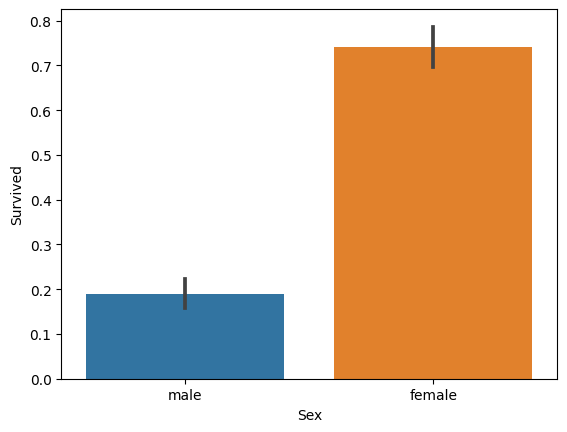

In [7]:
sns.barplot(x='Sex',y='Survived',data= train_data)
print("percentage of women survived: ", train_data['Survived'][train_data['Sex']=='female'].value_counts(normalize=True)[1]*100)
print("percentage of men survived: ", train_data['Survived'][train_data['Sex']=='male'].value_counts(normalize=True)[1]*100)


percentage of Pclass 1 survived:  62.96296296296296
percentage of Pclass 2 survived:  47.28260869565217
percentage of Pclass 3 survived:  24.236252545824847


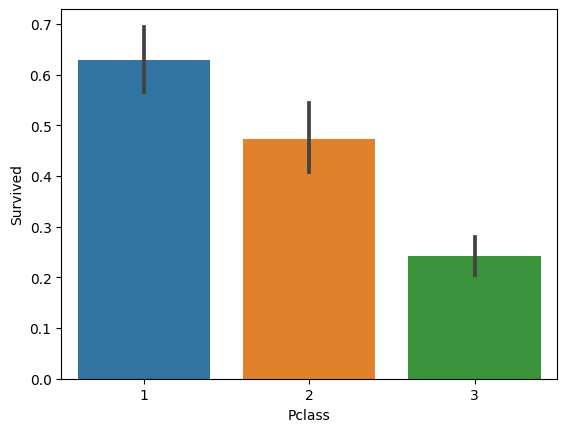

In [8]:
sns.barplot(x='Pclass',y='Survived',data= train_data)
print("percentage of Pclass 1 survived: ", train_data['Survived'][train_data['Pclass']==1].value_counts(normalize=True)[1]*100)
print("percentage of Pclass 2 survived: ", train_data['Survived'][train_data['Pclass']==2].value_counts(normalize=True)[1]*100)
print("percentage of Pclass 3 survived: ", train_data['Survived'][train_data['Pclass']==3].value_counts(normalize=True)[1]*100)


<Axes: xlabel='AgeGroup', ylabel='Survived'>

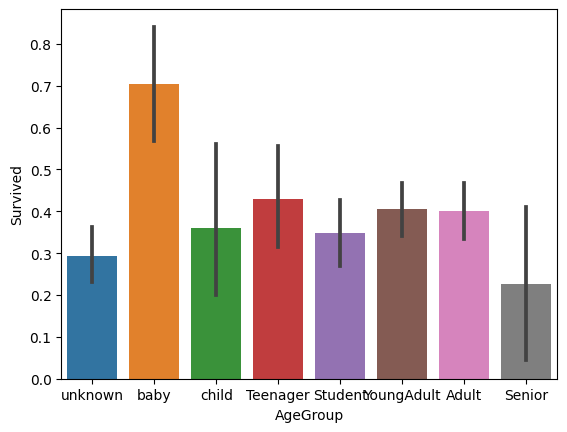

In [9]:
train_data.Age = train_data.Age.fillna(-0.5)
test_data.Age = test_data.Age.fillna(-0.5)


category = [-1,0,5,12,18,24,35,60,np.inf]

labels = ['unknown','baby','child','Teenager','Student','YoungAdult','Adult','Senior']

train_data['AgeGroup'] = pd.cut(train_data['Age'], category, labels=labels)
test_data['AgeGroup'] = pd.cut(test_data['Age'], category, labels=labels)


sns.barplot(x="AgeGroup", y="Survived", data=train_data)


In [10]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [11]:
train_data = train_data.drop(['Ticket','Fare','Cabin'],axis=1)
test_data = test_data.drop(['Ticket','Fare','Cabin'],axis=1)


<strong>Missing Values </strong>

In [12]:
print("No.of people embarking in Southamton(s)")
Southampton = train_data[train_data['Embarked'] == 'S'].shape[0]
print(Southampton)



print("No.of people embarking in Cherbourg(s)")
cherbg = train_data[train_data['Embarked'] == 'C'].shape[0]
print(cherbg)

print("No.of people embarking in Queens(s)")
Quenns = train_data[train_data['Embarked'] == 'Q'].shape[0]
print(Quenns)




No.of people embarking in Southamton(s)
644
No.of people embarking in Cherbourg(s)
168
No.of people embarking in Queens(s)
77


<h1> Feature Engineering</h1>

In [13]:
train_data = train_data.fillna({"Embarked": "S"})


In [14]:
combine_data = [train_data,test_data]


for dataset in combine_data:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
pd.crosstab(train_data['Title'],train_data['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [15]:
for dataset in combine_data:
  dataset['Title'] = dataset['Title'].replace(["Lady","Capt","Col","Don","Dr","Major","Rev","Jonkheer","Dona"],"Rare")
  dataset['Title'] = dataset['Title'].replace(['Countess','Lady','Sir'],"Royal")
  dataset['Title'] = dataset['Title'].replace("Mlle","Miss")
  dataset['Title'] = dataset['Title'].replace("Ms","Miss")
  dataset['Title'] = dataset['Title'].replace("Mme","Mrs")



train_data[['Title','Survived']].groupby(['Title'],as_index=False).mean()['Title']


0    Master
1      Miss
2        Mr
3       Mrs
4      Rare
5     Royal
Name: Title, dtype: object

In [16]:
title_map = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Royal':5,'Rare':6}

for dataset in combine_data:
  dataset['Title'] = dataset['Title'].map(title_map)
  dataset['Title'] = dataset['Title'].fillna(0)

train_data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,YoungAdult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,YoungAdult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,YoungAdult,1


In [17]:
mr_age = train_data[train_data['Title'] == 1]['AgeGroup'].mode() #young adult
miss_age = train_data[train_data['Title'] == 2]['AgeGroup'].mode() #student
mrs_age = train_data[train_data['Title'] == 3]['AgeGroup'].mode()  #Adult
master_age = train_data[train_data['Title'] == 4]['AgeGroup'].mode() #Baby
royal_age = train_data[train_data['Title'] == 5]['AgeGroup'].mode()  #Adult
rare_age = train_data[train_data['Title'] == 6]['AgeGroup'].mode()   #Adult


In [18]:
age_title_map = {1:'Young Adult',2:'Student',3: 'Adult',4: 'Baby',5:'Adult',6:'Adult'}

for i in range(len(train_data['AgeGroup'])):
  if train_data['AgeGroup'][1] == 'unknown':
    train_data['AgeGroup'][1] = age_title_map[train_data['Title'][1]]




for i in range(len(train_data['AgeGroup'])):
  if test_data['AgeGroup'][1] == 'unknown':
    test_data['AgeGroup'][1] = age_title_map[test_data['Title'][1]]


In [19]:
train_data.AgeGroup.unique()

['Student', 'Adult', 'YoungAdult', 'unknown', 'baby', 'Teenager', 'child', 'Senior']
Categories (8, object): ['unknown' < 'baby' < 'child' < 'Teenager' < 'Student' < 'YoungAdult' < 'Adult' <
                         'Senior']

<h1>Model building</h>

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

transform = ['Sex','AgeGroup','Embarked']

for i in transform:
  train_data[i] = le.fit_transform(train_data[i])
  test_data[i] = le.fit_transform(test_data[i])




**Machine learning Model**

In [21]:
x_train = train_data.drop(['PassengerId','Name','Survived'],axis=1)
y_train = train_data['Survived']
x_test = test_data.drop(['PassengerId','Name'],axis=1)


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train_split, y_train_split)


predictions = svm_model.predict(x_val)







In [35]:
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1])

In [41]:
from sklearn.metrics import f1_score, precision_score

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
precision = precision_score(y_val, predictions)

print("Validation Accuracy:", accuracy)
print("F1-score on validation set:", f1)
print("Precision on validation set:", precision)






Validation Accuracy: 0.770949720670391
F1-score on validation set: 0.7210884353741497
Precision on validation set: 0.726027397260274
